# Iterative EndPoint Fit Algorithm

## Dasar Teori

## Dependencies

1. NumPy
2. SciPy
3. MatplotLib
4. Pandas
5. Math

## Import Semua Library yang Dibutuhkan

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

## Representasi Titik

Titik direpresentasikan dalam bentuk array yang berisi elemen x dan y. Dimana x adalah koordinat titik pada sumbu x dan y adalah koordinat titik pada sumbu y. Untuk mendeklarasikan titik dapat menggunakan sintaks di bawah ini. p0 merupakan sebuah titik yang berada pada koordinat x = 10 dan y = 5

$P=\{x,y\}$

In [2]:
p0 = np.array([10,5])

In [3]:
p0

array([10,  5])

## Representasi Garis

Garis direpresentasikan dalam bentuk array yang berisi elemen dari dua buah titik. Dimana titik pertama adalah P0 dan titik kedua adalah P1. Untuk mendeklarasikan sebuah garis dapat dilakukan dengan cara membuat dua buah titik yang berfungsi sebagai endpoint terlebih dahulu. Kemudian kedua titik tersebut digunakan sebagai elemen dari array untuk merepresentasikan garis. 

$\overleftrightarrow{AB}$

$L = \{P_0,..,P_n\}$


In [4]:
p0 = np.array([0,0])
p1 = np.array([10,10])
l0 = np.array([p0,p1])

In [5]:
l0

array([[ 0,  0],
       [10, 10]])

## Dataset Titik

Dataset titik merupakan sebuah array yang berisi kumpulan dari beberapa titik. Contoh pada sintaks dibawah ini merupakan sebuah dataset titik yang berisi empat buah titik p0, p1, p2 dan p3. 

In [6]:
p0 = np.array([0,0])
p1 = np.array([2,2])
p2 = np.array([3,4])
p3 = np.array([4,10])

dP = np.array([p0,p1,p2,p3])

In [7]:
dP

array([[ 0,  0],
       [ 2,  2],
       [ 3,  4],
       [ 4, 10]])

Contoh sintaks program untuk menampilkan nilai koordinat x dari dataset titik yang telah dibuat diatas

In [8]:
# Menampilkan sumbu x dari dataset titik
dP[:4,:1] 

array([[0],
       [2],
       [3],
       [4]])

Contoh sintaks program untuk menampilkan nilai koordinat y dari dataset titik yang telah dibuat diatas

In [9]:
# Menampilkan sumbu y dari dataset titik
dP[:4,1:] 

array([[ 0],
       [ 2],
       [ 4],
       [10]])

Dataset titik dapat divisualisasikan kedalam sebuah grafik 2 dimensi dengan cara seperti berikut ini

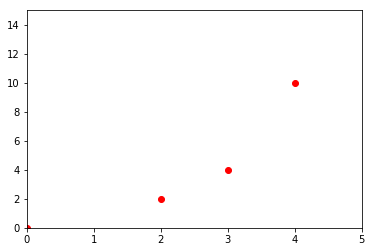

In [10]:
plt.plot(dP[:4,:1], dP[:4,1:], 'ro')
plt.axis([0, 5, 0, 15])
plt.show()

## Dataset Titik dari File CSV

Untuk aplikasi robotika sebuah dataset titik dapat dibentuk dari hasil pembacaan sensor. Contoh sensor lidar, ultrasonik, kamera, infrared. Hasil pembacaan sensor tersebut dapat disimpan ke sebuah file CSV untuk selanjutnya dilakukan analisis di bawah ini. Mengambil nilai koordinat titik dari file csv dapat dilakukan menggunakan library Pandas. Adapun sintak programnya adalah berikut ini.

In [11]:
df = pd.read_csv('D:\Research\IEPF-Line-Extraction\Source-Code\dataset.csv')
dP = df.as_matrix()

Secara default pandas akan menambahkan satu kolom tambahan sebagai informasi nomor data yang dimulai dari 0 sampai n. Dua kolom selanjutnya merupakan data koordinat x dan koordinat y.

In [12]:
dP

array([[  0,   0, 349],
       [  1,   0, 338],
       [  2,   0, 327],
       [  3,   0, 315],
       [  4,   0, 304],
       [  5,   0, 292],
       [  6,   0, 281],
       [  7,   0, 269],
       [  8,   0, 256],
       [  9,   0, 244],
       [ 10,   0, 231],
       [ 11,   0, 218],
       [ 12,   0, 204],
       [ 13,   0, 190],
       [ 14,   0, 176],
       [ 15,   0, 160],
       [ 16,   0, 144],
       [ 17,  18, 141],
       [ 18,  53, 152],
       [ 19,  69, 150],
       [ 20,  92, 155],
       [ 21, 113, 160],
       [ 22, 127, 161],
       [ 23, 145, 165],
       [ 24, 159, 168],
       [ 25, 176, 176],
       [ 26, 187, 177],
       [ 27, 195, 174],
       [ 28, 205, 176],
       [ 29, 215, 178],
       [ 30, 224, 179],
       [ 31, 233, 181],
       [ 32, 242, 184],
       [ 33, 250, 186],
       [ 34, 257, 186],
       [ 35, 265, 188],
       [ 36, 272, 192],
       [ 37, 279, 193],
       [ 38, 285, 195],
       [ 39, 292, 196],
       [ 40, 298, 197],
       [ 41, 303

In [13]:
dP = dP[:,1:]

In [14]:
dP

array([[  0, 349],
       [  0, 338],
       [  0, 327],
       [  0, 315],
       [  0, 304],
       [  0, 292],
       [  0, 281],
       [  0, 269],
       [  0, 256],
       [  0, 244],
       [  0, 231],
       [  0, 218],
       [  0, 204],
       [  0, 190],
       [  0, 176],
       [  0, 160],
       [  0, 144],
       [ 18, 141],
       [ 53, 152],
       [ 69, 150],
       [ 92, 155],
       [113, 160],
       [127, 161],
       [145, 165],
       [159, 168],
       [176, 176],
       [187, 177],
       [195, 174],
       [205, 176],
       [215, 178],
       [224, 179],
       [233, 181],
       [242, 184],
       [250, 186],
       [257, 186],
       [265, 188],
       [272, 192],
       [279, 193],
       [285, 195],
       [292, 196],
       [298, 197],
       [303, 198],
       [309, 201],
       [315, 203],
       [320, 205],
       [325, 206],
       [330, 208],
       [335, 210],
       [341, 210],
       [346, 212],
       [351, 214],
       [356, 216],
       [361,

In [15]:
# Mencari total jumlah dataset point
totP,_ = dP.shape

In [16]:
totP

89

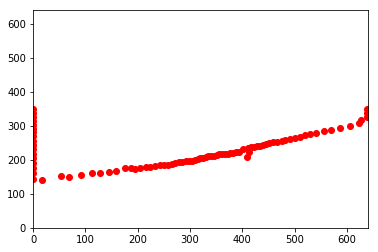

In [17]:
plt.plot(dP[:totP,:1], dP[:totP,1:], 'ro')
plt.axis([0, 640, 0, 640])
plt.show()

In [18]:
# Fungsi load dataset
# Input berupa file csv
# Output berupa dataset point dalam bentuk kumpulan koordinat x,y
def csvToDatasetPoint(csvFile):
    df = pd.read_csv(csvFile)
    dP = df.as_matrix()
    dP = dP[:,1:]
    return dP

In [19]:
csvToDatasetPoint('D:\Research\IEPF-Line-Extraction\Source-Code\dataset.csv')

array([[  0, 349],
       [  0, 338],
       [  0, 327],
       [  0, 315],
       [  0, 304],
       [  0, 292],
       [  0, 281],
       [  0, 269],
       [  0, 256],
       [  0, 244],
       [  0, 231],
       [  0, 218],
       [  0, 204],
       [  0, 190],
       [  0, 176],
       [  0, 160],
       [  0, 144],
       [ 18, 141],
       [ 53, 152],
       [ 69, 150],
       [ 92, 155],
       [113, 160],
       [127, 161],
       [145, 165],
       [159, 168],
       [176, 176],
       [187, 177],
       [195, 174],
       [205, 176],
       [215, 178],
       [224, 179],
       [233, 181],
       [242, 184],
       [250, 186],
       [257, 186],
       [265, 188],
       [272, 192],
       [279, 193],
       [285, 195],
       [292, 196],
       [298, 197],
       [303, 198],
       [309, 201],
       [315, 203],
       [320, 205],
       [325, 206],
       [330, 208],
       [335, 210],
       [341, 210],
       [346, 212],
       [351, 214],
       [356, 216],
       [361,

## Jarak antar titik
Fungsi untuk menghitung jarak antara dua titik

* Input : Koordinat titik A dan koordinat titik B

* Ouput : Jarak antara dua titik

In [20]:
def distancePointToPoint(p0, p1):
    return math.sqrt(((p1[0]-p0[0])*(p1[0]-p0[0])) + ((p1[1]-p0[1])*(p1[1]-p0[1])))

In [21]:
pointA = np.array([0,0])

In [22]:
pointB = np.array([10,20])

In [23]:
distancePointToPoint(pointA, pointB)

22.360679774997898

## Fungsi Garis

$y = mx + b$

Fungsi untuk mencari persamaan garis

* Input : Koordinat Titik 1 dan koordinat titik 2
* Output : Nilai m (gradient) dan b (constanta)

In [24]:
# Hanya berlaku jika garis memiliki kemiringan
def lineFunction(l0):
#     Tipe garis 0 = miring, 1 = gradien = 0, -1 gradien tak hingga
    ltype = 0
#     Jika delta x = 0
    if l0[1,0] - l0[0,0] == 0:
        ltype = -1
    elif l0[1,1] - l0[0,1] == 0:
        ltype = 1
    else:
        ltype = 0

    if ltype == 0:
        m = float(l0[1,1] - l0[0,1]) / float(l0[1,0] - l0[0,0])
        b = float(l0[0,1] - m * l0[0,0])
    else:
        m = 0
        b = 0
        
    return ltype, m, b

In [25]:
p0 = np.array([10,0])
p1 = np.array([0,0])

l0 = np.array([p0,p1])

lineFunction(l0)

(1, 0, 0)

Convert y=mx+b to ax+bx+c=0
https://www.youtube.com/watch?v=h13wI_gi4GA

In [26]:
def convertToABC(ltype, m, b):
    if ltype == -1:
        _a = 0.00
        _b = 0.00
        _c = 0.00
    elif ltype == 1:
        _a = 0.00
        _b = 0.00
        _c = 0.00
    else:
        _a = m * -1.00
        _b = 1.00
        _c = b * -1.00
    return _a, _b, _c

In [27]:
a, b, c = convertToABC(0, 2, 1.6)

In [28]:
a

-2.0

In [29]:
b

1.0

In [30]:
c

-1.6

## Jarak titik ke garis
https://www.youtube.com/watch?v=h13wI_gi4GA

$d = |ax + by + c| / $

In [31]:
def distancePointToLine(p0, l0):
#     Jika delta x = 0
#     if l?[1,0] - l0[0,0] != 0:
    ltype, m, b = lineFunction(l0)
#     print ltype
    _a, _b, _c = convertToABC(ltype, m, b)
    d = 0
    if ltype == -1:
        d = abs(p0[0] - l0[0,0])
    elif ltype == 1:
        d = abs(p0[1] - l0[0,1])
    else:
        d = abs(_a * p0[0] + _b * p0[1] + _c) / math.sqrt(_a * _a + _b * _b)

    return d
    

In [32]:
# Example

p0 = np.array([2,1])
l0 = np.array([[0,100],[10,10]])

distancePointToLine(p0, l0)

8.94495361206257

## Iterative End Point Fit

### Split

Input berupa dataset point
Ouput berupa cluster point

In [33]:
def split(threshold, dP, eP):
#     print 'Masuk IEPF'
    maxD = 0
    breakPointIndex = -1

    totalPoint, _ = dP.shape
    totalEndPoint = eP.size
    
    for i in range(0,totalEndPoint-1):
        eP0 = eP[i]
        ePN = eP[i+1] - 1 # Ini coba di cek lagi

        l0 = np.array([dP[eP0],dP[ePN]])

        for j in range(eP[i],eP[i+1]):
            tempD =  distancePointToLine(dP[j], l0)
            if tempD > threshold:
                if (tempD > maxD):
                    maxD = tempD
                    breakPointIndex = j
        
    if breakPointIndex != -1:
        eP = np.insert(eP, [totalEndPoint-1], breakPointIndex)
        eP = split(threshold, dP, eP)
        
    return eP    

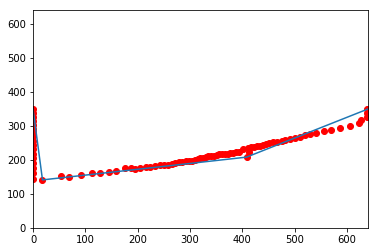

In [71]:
dP = csvToDatasetPoint('D:\Research\IEPF-Line-Extraction\Source-Code\dataset.csv')
totalP, _ = dP.shape

# print 'Jumlah Point'
# print jumlahPoint

p0 = np.array([dP[0,0],dP[0,1]])
p1 = np.array([dP[totalP-1,0],dP[totalP-1,1]])
eP = np.array([0,totalP-1])
# print p

# a = e
# print p.size
eP = split(30, dP, eP)
totalEP = eP.size
# print eP.size
# X
# print dP[eP[0:4],:1] 
# print dP[eP[0:4],1:] 
plt.plot(dP[:totalP,:1], dP[:totalP,1:], 'ro')
plt.plot(dP[eP[0:totalEP],:1], dP[eP[0:totalEP],1:])
plt.axis([0, 640, 0, 640])
plt.show()


### Merge

Input berupa minimal panjang, dataset point dan endpoint awal
Outpu berupa endpoint yang sudah di merge

In [ ]:
def merge(threshold, dP, eP):
#     print dP
    totalEndPoint = eP.size
#     print totalEndPoint-1
    # Jangan pakai in range
    i = 0
    while i < totalEndPoint-1 :
#     for i in range(0, totalEndPoint-1):
        print 'I = {}'.format(i)
        print 'eP Index = {}'.format(i)
        print 'totalEndPoint = {}'.format(totalEndPoint)
        eP0 = eP[i]
        ePN = eP[i+1] 
        
        print 'eP0 = {}'.format(eP0)
        print 'ePN = {}'.format(ePN)
        tempD = distancePointToPoint(dP[eP0], dP[ePN])
        print tempD
        # Jika jarak antara kedua titik kurang dari threshold
        if tempD < threshold:
            # Delete endpoint
            eP = np.delete(eP,[i+1])
#             totalEndPoint = totalEndPoint - 2
            # Update latest totalEndPoint
            totalEndPoint = eP.size
            print 'Merge'
        i = i + 1
        print '---------------------'
    return eP

In [ ]:
print eP

In [ ]:
eP = merge(200, dP, eP)

In [ ]:
eP

In [ ]:
plt.plot(dP[:totalP,:1], dP[:totalP,1:], 'ro')
plt.plot(dP[eP[0:totalEP],:1], dP[eP[0:totalEP],1:])
plt.axis([0, 640, 0, 640])
plt.show()

## Least Square Method

https://www.youtube.com/watch?v=JvS2triCgOY

In [35]:
def calcVarSubVarMean(var, varMean):
    return var - varMean

vcalcVarSubVarMean = np.vectorize(calcVarSubVarMean)

In [40]:
# fix oke
def leastSquareMethod(dP):
    m = 0
    b = 0
    ltype = 0
    meanPointX = np.mean(dP[:,:1])
    meanPointY = np.mean(dP[:,1:])
    npXsubXmean = vcalcVarSubVarMean(dP[:,:1],meanPointX)
    npYsubYmean = vcalcVarSubVarMean(dP[:,1:],meanPointY)
    num = np.sum(np.multiply(npXsubXmean, npYsubYmean))
    den = np.sum(np.power(npXsubXmean, 2))
    if den == 0:
        # garis gradient tak hingga
        ltype = -1
    elif num == 0: 
        # garis gradient 0
        ltype = 1
    else:
        ltype = 0
        m = num / den
        b = meanPointY - m * meanPointX
    return ltype, m, b

In [84]:
# Input berupa dataset point yg sudah diklaster
# Outpu berupa endpoint dari persamaan garis yang sudah di fitting
def fittingLine(dP, eP):
    totalEndPoint = eP.size
    fitEP = np.zeros((eP.size,2))
    last_x = 0
    last_y = 0
    i = 0
    while i < totalEndPoint-1 :
        eP0 = eP[i]
        ePN = eP[i+1] 
#         print 'cluster'
        ltype, m, b = leastSquareMethod(dP[eP0:ePN,:])
#         print 'Ltype = {} M = {} B = {}'.format(ltype, m, b)      
        if ltype == -1:
            if i == 0: # jika titik pertama
                _x = np.mean(dP[eP0:ePN,:1]) # ambil point x dari rata2
                _y = dP[eP0,1] # ambil nilai y langsung
                fitEP[i,0] = _x
                fitEP[i,1] = _y
            _x = last_x # gradient tak hingga nilai x selalu sama
            _y = dP[ePN,1]
            fitEP[i+1,0] = _x
            fitEP[i+1,1] = _y
        elif ltype == 1:
            if i == 0: # jika titik pertama
                _x = dP[eP0,0] # ambil point x langsung
                _y = np.mean(dP[eP0:ePN,1:]) # ambil nilai y dari rata2
                fitEP[i,0] = _x
                fitEP[i,1] = _y
            _x = dP[ePN,0] # gradient tak hingga nilai x selalu sama
            _y = last_y
            fitEP[i+1,0] = _x
            fitEP[i+1,1] = _y
        else:
            if i == 0: # jika titik pertama
                _x = dP[eP0,0] # ambil point x langsung
                _y = m * _x + b
                fitEP[i,0] = _x
                fitEP[i,1] = _y
            _x = dP[ePN,0] # gradient tak hingga nilai x selalu sama
            _y = m * _x + b
            fitEP[i+1,0] = _x
            fitEP[i+1,1] = _y
#         print fitEP
        last_x = _x
        last_y = _y
        i = i + 1
        
    return fitEP

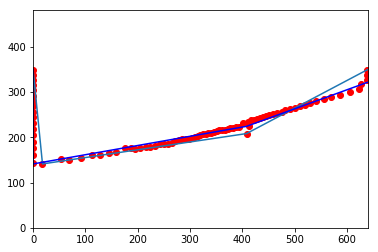

In [90]:
newFit = fittingLine(dP, eP)

plt.plot(dP[:totalP,:1], dP[:totalP,1:], 'ro')
plt.plot(dP[eP[0:totalEP],:1], dP[eP[0:totalEP],1:])
plt.plot(newFit[:,:1], newFit[:,1:], color="blue")
plt.axis([0, 640, 0, 480])
plt.show()